<a href="https://colab.research.google.com/gist/jonghank/da2e6c0acb8789e08c434fb58ae69874/linear_algebra_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear algebra review

Partially taken from _Convex Optimization_ by Boyd and Vandenberghe.
$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
$$

__<div style="text-align: right"> ASE7030: Convex Optimization, Inha University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@inha.ac.kr) </div>_


<br>

## Norms

### Inner product and Euclidean norm

The _standard inner product_ on $\R^n$, the set of real $n$-vectors, is given by

$$
  \langle x,y\rangle = x^Ty = \sum_i x_iy_i
$$

for $x, y \in \R^n$. 



The _Euclidean norm_, or $\ell_2$_-norm_, of a vector $x\in\R^n$ is defined as

$$
\|x\|_2 = \left( x^Tx\right)^{1/2} = \left( x_1^2 + \cdots + x_n^2  \right)^{1/2}
$$



The _Cauchy-Schwartz inequality_ states that $| x^T y| \le \|x\|_2\|y\|_2$ for any $x, y \in \R^n$.
The (unsigned) _angle_ between nonzero vectors $x, y\in  \R^n$ is defined as

$$
\angle (x,y)=\cos^{-1} \left(\frac{x^Ty}{\|x\|_2 \|y\|_2}\right)
$$

where we take $\cos^{-1}u \in [0, \pi]$. We say $x$ and $y$ are _orthogonal_ if $x^T y = 0$.

The standard inner product on $\R^{m\times n}$, the set of $m\times  n$ real matrices, is given by

$$
\langle X,Y \rangle= \tr\left(X^T Y\right)= \sum_i \sum_j X_{ij}Y_{ij}
$$

for $X, Y\in \R^{m\times n}$. Here, the $\tr(\cdot )$ is nothing but the sum of all the diagonal elements. Note that the inner product of two matrices is the inner product of the associated vectors, in $\R^{mn}$, obtained by listing the coefficients of the matrices in some order, such as row major.

The _Frobenius_ norm of a matrix $X \in \R^{m\times n}$ is given by

$$
\|X\|_F = \tr\left(X^TX\right)^{1/2} =  \left( \sum_i \sum_j X_{ij}^2\right)^{1/2}
$$

The Frobenius norm is the Euclidean norm of the vector obtained by listing the coefficients of the matrix. 



<br>

### Norms, distance, and unit ball

A function $f : \R^n \rightarrow \R$ with $\dom f =\R^n$ is called a _norm_ if


- $f$ is nonnegative: $f(x)\ge0$ for all $x\in\R^n$
- $f$ is definite: $f(x)=0$ only if $x=0$
- $f$ is homogeneous: $f(tx) = |t|f(x)$, for all $x\in\R^n$ and $t\in\R$
- $f$ satisfies the triangle inequality: $f(x+y)\le f(x)+f(y)$, for all $x,y\in\R^n$

We use the notation $f(x) = \|x\|$, which is meant to suggest that a norm is a generalization of the absolute value on $\R$. When we specify a particular norm, we use the notation $\|x\|_\text{symb}$, where the subscript is a mnemonic to indicate which norm is meant.

A norm is a measure of the _length_ of a vector $x$; we can measure the _distance_ between two vectors $x$ and $y$ as the length of their difference, $\ie$, 

$$
\dist(x, y) = \|x-y\|
$$

We refer to $\dist(x, y)$ as the distance between $x$ and $y$, in the norm $\|\cdot\|$.

The set of all vectors with norm less than or equal to one, 

$$
\ball=\{x\in\R^n \ |\  \|x\|\le1\}
$$

is called the _unit ball_ of the norm $\|\cdot\|$. The unit ball satisfies the following properties:

- $\ball$ is symmetric about the origin, $\ie$, $x\in\ball$ if and only if $−x\in\ball$
- $\ball$ is convex
- $\ball$ is closed, bounded, and has nonempty interior

(-1.1, 1.1, -1.1, 1.1)

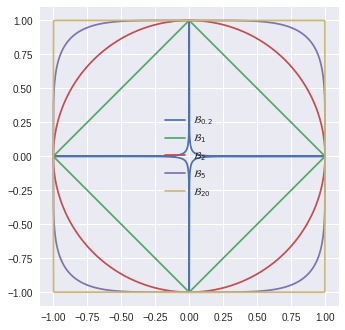

In [ ]:
import matplotlib.pyplot as plt

x = np.linspace(-1,1,1001)
y_h = (1 - abs(x)**(0.2))**(1/0.2)
y_1 = (1 - abs(x))
y_2 = (1 - abs(x)**2)**(1/2)
y_5 = (1 - abs(x)**5)**(1/5)
y_20 = (1 - abs(x)**200)**(1/200)
X = np.hstack((x,-x))
Y_h = np.hstack((y_h,-y_h))
Y_1 = np.hstack((y_1,-y_1))
Y_2 = np.hstack((y_2,-y_2))
Y_5 = np.hstack((y_5,-y_5))
Y_20 = np.hstack((y_20,-y_20))
plt.figure()
plt.plot(X,Y_h, label=r'$\mathcal{B}_{0.2}$')
plt.plot(X,Y_1, label=r'$\mathcal{B}_1$')
plt.plot(X,Y_2, label=r'$\mathcal{B}_2$')
plt.plot(X,Y_5, label=r'$\mathcal{B}_5$')
plt.plot(X,Y_20, label=r'$\mathcal{B}_{20}$')
plt.legend()
plt.axis('square')

<br>

### Examples of norms

The simplest example of a norm is the absolute value on $\R$. Another simple example is the Euclidean or $\ell_2$-norm on $\R^n$. Two other frequently used norms on $\R^n$ are the _sum-absolute-value_, or $\ell_1$_-norm_, given by

$$
\|x\|_1 =|x_1|+\cdots+|x_n|
$$

and the _Chevyshev_ or $\ell_\infty$_-norm_, given by

$$
\|x\|_\infty =\max\{|x_1|, \ldots, |x_n|\}
$$

These three norms are part of a family parametrized by a constant traditionally
denoted $p$, with $p\ge1$: the $\ell_p$_-norm_ is defined by

$$
\|x\|_p = \left(|x_1|^p + \cdots + |x_n|^p\right)^{1/p}
$$

This yields the $\ell_1$-norm when $p = 1$ and the Euclidean norm when $p = 2$. It is easy to show that for any $x \in \R^n$,

$$
\lim_{p\rightarrow\infty} \|x\|_p =\max\{|x_1|,\ldots,|x_n|\} 
$$
so the $\ell_\infty$-norm also fits in this family as a limit.

Another important family of norms are the _quadratic norms_. For $P\in \SM^n_{++}$, we
define the $P$-quadratic norm as

$$
\|x\|_P = \left(x^T P x\right)^{1/2} = \|P^{1/2}x\|_2
$$

The unit ball of a quadratic norm is an ellipsoid (and conversely, if the unit ball of a norm is an ellipsoid, the norm is a quadratic norm).
Some common norms on $\R^{m\times n}$ are the Frobenius norm, the sum-absolute-value norm,

$$
\|X\|_\text{sav} = \sum_i \sum_j |X_{ij}|
$$

and the maximum-absolute-value norm,

$$
\|X\|_\text{mav} = \max_{i,j} |X_{ij}|
$$


<br>

## Linear independence

<br>

### Linear dependence

Set of $n$-vectors $\{a_1,\dots,a_k\}$ (with $k\ge1$) is _linearly dependent_ if 
$$
a_1 x_1 + \cdots + a_k x_k = 0
$$
holds for some $x_1,\dots,x_k$ that are not all zero.

<br>

### Linear independence

Set of $n$-vectors $\{a_1,\dots,a_k\}$ (with $k\ge1$) is _linearly independent_ if it is not linearly dependent, i.e.,
$$
a_1 x_1 + \cdots + a_k x_k = 0
$$
holds only when $x_1=\cdots=x_k=0$.

<br>

## Range and nullspace

Let $A\in\R^{m\times n}$. The _range_ of $A$, denoted $\range(A)$, is the set of all vectors in $\R^m$ that can be written as linear combinations of the columns of $A$, $\ie$,

$$
  \range(A) = \{ Ax \ | \ x\in\R^{n} \} 
$$

The range $\range(A)$ is a subspace of $R^m$, $ie$, it is itself a vector space. Its dimension is the _rank_ of $A$, denoted $\rank(A)$. The rank of $A$ can never be greater than the
minimum of $m$ and $n$. We say $A$ has _full rank_ if $\rank(A) = \min\{m, n\}$.
The _nullspace_ (or _kernel_) of $A$, denoted $\null(A)$, is the set of all vectors $x$ mapped
into zero by $A$:

$$
  \null(A) = \{x \ | \ Ax = 0\}
$$

The nullspace is a subspace of $\R^n$.

<br>

### Rank

We define the rank of $A\in\R^{m\times n} as

$$
\rank(A) = \dim \range(A)
$$

- $\rank A = \rank A^T$
- $\rank A \le\min (m,n)$
- $\dim \range(A) + \dim \null(A) = n$

- $\rank(A)$ is dimension of set 'hit' by the mapping $y=Ax$ (the number of degrees of freedom in output $y$)
- $\dim \null(A)$ is dimension of set of $x$ 'crushed' to zero by $y=Ax$ (the number of degrees of freedom lost in the mapping from $x$ to $y=Ax$)



<br>

### Orthogonal decomposition induced by $A$

If $\mc{V}$ is a subspace of $\R^n$, its _orthogonal complement_, denoted $\mc{V}^\perp$, is defined as

$$
  \mc{V}^\perp = \{ x \ | \ z^Tx = 0, \forall z\in\mc{V} \}
$$

(As one would expect of a complement, we have $\mc{V}^{\perp\perp} = \mc{V}$.)

A basic result of linear algebra is that, for any $A \in\R^{m\times n}$, we have that

$$
  \null(A) = \range(A^T)^\perp
$$

Applying the result to $A^T$ we also have 

$$
  \range(A) = \null(A^T)^\perp
$$

This result is often stated as

$$
  \null(A) \overset{\perp}{\oplus} 
  \range(A^T) = \R^n
$$

Here the symbol $\overset{\perp}{\oplus}$ refers to orthogonal direct sum, $\ie$, the sum of two subspaces
that are orthogonal. The above decomposition of $\R^n$
is called the orthogonal decomposition induced by $A$.

<br>

## Symmetric eigenvalue decomposition

<br>

### Eigenvalues and eigenvectors of symmetric matrices
If $A\in\R^{n\times n}$ is symmetric, i.e., $A=A^T$, then
- the eigenvalues of $A$ are all real
- there is a set of $n$ orthonormal eigenvectors of $A$ 

<br> 

### Spectral decomposition

Suppose $A\in \SM^n$. Then $A$ can be factored as

$$
  A = Q\Lambda Q^T
$$

where $Q\in\R^{n\times n}$ is _orthogonal_, _i.e._, satisfies $Q^T Q = I$, and $\Lambda = \diag(\lambda_1,\ldots , \lambda_n)$. The (real) numbers $\lambda_i$ are the _eigenvalues_ of $A$, and are the roots of the _characteristic polynomial_ $\det(sI - A)$. The columns of $Q$ form an orthonormal set of _eigenvectors_ of $A$, i.e., $Q = \bmat{q_1 & \dots & q_n}$. The above factorization is called the _spectral decomposition_ or
(symmetric) _eigenvalue decomposition_ of $A$.

Multiplication by $A$ is the same as
- rotate by $Q^T$
- diagonal real scale ('dilation') by $\Lambda$
- rotate back by $Q$

We order the eigenvalues as $\lambda_1 \ge \lambda_2 \ge \cdots \ge \lambda_n$. We use the notation $\lambda_i(A)$ to refer to the $i$th largest eigenvalue of $A\in\SM$. We usually write the largest or
maximum eigenvalue as $\lambda_1(A) = \lambda_\max(A)$, and the least or minimum eigenvalue as
$\lambda_n(A) = \lambda_\min(A)$.

The determinant and trace can be expressed in terms of the eigenvalues,

$$
\begin{align*}
\det A &= \prod_i \lambda_i \\
\tr A &= \sum_i \lambda_i 
\end{align*}
$$

as can the spectral and Frobenius norms,

$$
\begin{align*}
\|A\|_2 &= \max_i |\lambda_i| \\
\|A\|_F &= \left(\sum_i  \lambda_i^2 \right)^{1/2}
\end{align*}
$$


In [ ]:
np.random.seed(786)
B = np.random.randn(5,5)   # B not symmetric
X = np.random.randn(5,5)
A = X + X.T   # A symmetric

evalB, evecB = np.linalg.eig(B)
evalA, evecA = np.linalg.eig(A)
print (evalB)   # these can be complex
print (evalA)   # these should be all real

[-1.73065369+1.072814j   -1.73065369-1.072814j    2.36025276+2.30625654j
  2.36025276-2.30625654j  0.95377092+0.j        ]
[-7.29430126 -4.51876145  5.08518425  2.81815644  2.07363051]


<br> 

### Quadratic forms

A quadratic form is a function $f: \R^n \rightarrow R$ of the form

$$
f(x) = x^T Ax = \sum_{i,j} A_{ij}x_i x_j
$$

and the following holds:

$$
\lambda_n x^Tx \le x^T A x \le \lambda_1 x^T x
$$


<br>

### Definiteness and matrix inequalities

The largest and smallest eigenvalues satisfy

$$
\begin{align*}
\lambda_\max(A) &= \sup_{x\neq 0}\frac{x^TAx}{x^Tx}\\
\lambda_\min(A) &= \inf_{x\neq 0}\frac{x^TAx}{x^Tx}
\end{align*}
$$

In particular, for any $x$, we have with both inequalities tight for (different) choices of $x$.

A matrix $A\in\SM^n$is called _positive definite_ if for all $x\neq0$, $x^TAx > 0$. 
We denote this as $A \succ 0$. By the inequality above, we see that $A \succ 0$ if and only all its eigenvalues are positive, _i.e._, $\lambda_\min(A) > 0$. If $-A$ is positive definite, we say $A$ is _negative definite_, which we write as $A\prec0$. We use $\SM^n_{++}$ to denote the set of positive definite matrices in $\SM^n$.

If $A$ satisfies $x^T Ax \ge 0$ for all $x$, we say that $A$ is _positive semidefinite_. If $-A$ is positive semidefinite, _i.e._, if $x^T Ax \le 0$ for all $x$, we say that $A$ is _negative semidefinite_. We use $\SM^n_+$ to denote the set of positicve semidefinite matrices in $\SM^n$.

For $A,B\in\SM^n$, we use $A\prec B$ to mean $B−A\succ0$, and so on. These inequalities are called _matrix inequalities_, or generalized inequalities associated with the positive semidefinite cone.



<br>

### Symmetric squareroot

Let $A\in\SM^n_+$, with eigenvalue decomposition $A = Q \diag(\lambda_1,\dots , \lambda_n)Q^T$. We define the (symmetric) squareroot of $A$ as

$$
  A^{1/2} =Q\diag(\lambda^{1/2}_1,\dots,\lambda^{1/2}_n)Q^T
$$

The squareroot $A^{1/2}$ is the unique symmetric positive semidefinite solution of the equation $X^2 = A$.

<br>

## Singular value decomposition

Suppose $A\in\R^{m\times n}$ with $\rank A = r$. Then $A$ can be factored as

$$
  A = U \Sigma V^T
$$

where $U\in\R^{m\times r}$ satisfies $U^TU =I$, $V\in\R^{n\times r}$ satisfies $V^TV =I$, and $\Sigma= \diag(\sigma_1,\dots, \sigma_r)$, with

$$
  \sigma_1 \ge \sigma_2 \ge \cdots \ge \sigma_r > 0
$$

The factorization is called the _(compact) singular value decomposition_ (SVD) of $A$.
The columns of $U$ are called _left singular vectors_ of $A$, the columns of $V$ are _right singular vectors_, and the numbers $\sigma_i$ are the _singular values_. The singular value decomposition can be written

$$
  A = \sum_i^r \sigma_i u_i v_i^T
$$

where $u_i\in\R^m$ are the left singular vectors, and $v_i\in\R^n$ are the right singular vectors.

The singular value decomposition of a matrix $A$ is closely related to the eigenvalue decomposition of the (symmetric, positive semidefinite) matrix $A^T A$. We can write

$$
  A^TA=V\Sigma^2V^T=\bmat{V & V^\perp} \bmat{\Sigma^2 & 0 \\ 0 & 0} \bmat{V & V^\perp}^T
$$

where $V^\perp$ is any matrix for which $\bmat{V & V^\perp}$ is orthogonal. The righthand expression is the eigenvalue decomposition of $A^T A$, so we conclude that its nonzero eigenvalues are the singular values of $A$ squared, and the associated eigenvectors of $A^T A$ are the right singular vectors of $A$. A similar analysis of $AA^T$ shows that its nonzero eigenvalues are also the squares of the singular values of $A$, and the associated eigenvectors are the left singular vectors of $A$.

The first or largest singular value is also written as $\sigma_\max(A)$. It can be expressed
 as

$$
\begin{align*}
\sigma_\max(A) &= \sup_{x,y\neq 0}\frac{x^TAy}{\|x\|_2\|y\|_2}
= \sup_{y\neq 0}\frac{\|Ay\|_2}{\|y\|_2}
\end{align*}
$$

The righthand expression shows that the maximum singular value is the $\ell_2$ operator norm of $A$. The _minimum singular value_ of $A\in\R^{m\times n}$ is given by

$$
\sigma_\min(A) = \begin{cases}
\sigma_r(A)  & r=\min\{m,n\}\\
0 & r<\min\{m,n\}
\end{cases}
$$

which is positive if and only if $A$ is full rank.

The singular values of a symmetric matrix are the absolute values of its nonzero
eigenvalues, sorted into descending order. The singular values of a symmetric positive semidefinite matrix are the same as its nonzero eigenvalues.

The condition number of a nonsingular $A\in\R^{n \times n}$, denoted $\cond(A)$ or $\kappa(A)$, is defined as

$$
  \cond(A) = \|A\|_2\|A^{-1}\|_2 = \frac{\sigma_\max(A)}{\sigma_\min(A)}
$$



<br>

### Operator norms

Suppose $\|\cdot\|_a$ and $\|\cdot\|_b$ are norms on $\R^m$ and $\R^n$, respectively. We define the _operator norm_ of $X\in\R^{m\times n}$, induced by the norms $\|\cdot\|_a$ and $\|\cdot\|_b$, as

$$
 \|X\|_{a,b} = \sup \{\|Xu\|_a \ |\ \|u\|_b\le 1\} 
$$

When$\|\cdot\|_a$ and $\|\cdot\|_b$ are both Euclidean norms, the operator norm of $X$ is its _maximum singular value_, and is denoted $\|X\|_2$:

$$
  \|X\|_2 = \sigma_\max (X) = \left( \lambda_\max (X^TX)\right)^{1/2}
$$

(This agrees with the Euclidean norm on $\R^m$, when $X\in\R^m$, so there is no clash of notation.) This norm is also called the _spectral norm_ or $\ell_2$_-norm_ of $X$.
As another example, the norm induced by the $\ell_\infty$-norm on $\R^m$ and $\R^n$, denoted $\|X\|_\infty$, is the _max-row-sum_ norm,

$$
 \|X\|_\infty = \sup \{\|Xu\|_\infty \ |\ \|u\|_\infty\le 1\} = \max_i \sum_j |X_{ij}|
$$

The norm induced by the $\ell_1$-norm on $\R^m$ and $\R^n$, denoted $\|X\|_1$, is the _max-column-sum_ norm,

$$
 \|X\|_1 = \sup \{\|Xu\|_1 \ |\ \|u\|_1\le 1\} = \max_j \sum_i |X_{ij}|
$$


In [ ]:
import numpy as np

X = np.random.randn(5,4) 
#print (X)
eigval, eigvec = np.linalg.eig(X@X.T)

UU, SS, VV = np.linalg.svd(X)

print(SS)

[2.33046043 1.60277627 1.04214624 0.67867793]


In [ ]:
X = np.random.randn(5,4) 
print (X)
eval, evec = np.linalg.eig(X.T@X)
print (np.sqrt(eval))
print (np.linalg.norm(X,2))

print (np.sum(abs(X), axis=1))
print (np.linalg.norm(X,np.inf))

print (np.sum(abs(X), axis=0))
print (np.linalg.norm(X,1))

[[ 0.09348062 -1.82502032  1.9906909   0.81100615]
 [ 2.36785025 -0.38802784 -2.17413427 -1.16184436]
 [-0.27945474  0.08232927  0.55931401  0.006406  ]
 [-0.23751882  2.77251093  1.32812058  0.92573163]
 [ 0.3770558   0.091086   -0.20675274  1.18275596]]
[4.20435996 1.65551408 1.07057649 3.25338682]
4.204359956892198
[4.72019799 6.09185672 0.92750402 5.26388196 1.8576505 ]
6.091856719543058
[3.35536023 5.15897436 6.2590125  4.0877441 ]
6.259012504344437


<br>

### Pseudo-inverse

Let $A=U\Sigma V^T$ be the (compact) singular value decomposition of $A\in\R^{m \times n}$, with $\rank A=r$. We define the _pseudo-inverse_ or _Moore-Penrose inverse_ of $A$ as

$$
  A^\dagger = V \Sigma^{-1} U^T \in \R^{n\times m}
$$

Alternative expressions are

$$
  A^\dagger = \lim_{\epsilon\rightarrow0} (A^TA+ \epsilon I)^{-1}A^T = 
  \lim_{\epsilon\rightarrow0} A^T(AA^T+ \epsilon I)^{-1}
$$

where the limits are taken with $\epsilon > 0$, which ensures that the inverses in the expressions exist. If $\rank A = n$, then $A^\dagger = (A^T A)^{-1} A^T$. If $\rank A = m$, then $A^\dagger = A^T (AA^T )^{-1}$. If $A$ is square and nonsingular, then $A^\dagger = A^{-1}$.

The pseudo-inverse comes up in problems involving least-squares, minimum norm, quadratic minimization, and (Euclidean) projection. For example, $A^\dagger b$ is a solution of the least-squares problem

$$
  \underset{x}{\minimize} \quad \|Ax-b\|_2
$$

in general. When the solution is not unique, $A^\dagger b$ gives the solution with minimum (Euclidean) norm. As another example, the matrix $A A^\dagger = UU^T$ gives (Euclidean) projection on $\range(A)$. The matrix $A^\dagger A = V V^T$ gives (Euclidean) projection on $\range(A^T )$.

The optimal value $p^*$ of the (general, nonconvex) quadratic optimization problem

$$
  \underset{x}{\minimize} \quad (1/2)x^TP x + q^T x + r
$$

where $P\in\SM^n$ can be expressed as

$$
  p^* = \begin{cases}
  -(1/2)q^TP^\dagger q + r & P \succeq0, q\in\range(P) \\
  -\infty & \text{otherwise}
  \end{cases}
$$

which generalizes the expression 

$$
  p^* = -(1/2)q^T P^{-1}q + r
$$

valid for $P \succ 0$.




<br>

## Schur complement

Consider a matrix $X\in\SM^n$ partitioned as

$$
  X = \bmat{A & B \\ B^T & C}
$$

where $A \in\SM^k$. If $\det A\neq 0$, the matrix

$$
  S = C - B^T A^{-1} B
$$

is called the _Schur complement_ of $A$ in $X$.
Schur complements arise in several contexts, and appear in many important formulas and theorems. For example, we have

$$
  \det X = \det A \det S
$$

<br>

### Inverse of block matrix

The Schur complement comes up in solving linear equations, by eliminating one block of variables. We start with

$$
  \bmat{A & B \\ B^T & C} \bmat{x \\ y}
  = \bmat{u \\v}
$$

and assume that $\det A\neq 0$. If we eliminate $x$ from the top block equation and substitute it into the bottom block equation, we obtain $v = B^T A^{-1}u + Sy$, so

$$
y = S^{-1}(v - B^T A^{-1}u)
$$

Substituting this into the first equation yields

$$
  x = \left( A^{-1} + A^{-1}BS^{-1}B^T A^{-1} \right)u - A^{-1}BS^{-1}v
$$

We can express these two equations as a formula for the inverse of a block matrix:

$$
\bmat{A & B \\ B^T & C}^{-1} =
\bmat{ A^{-1} + A^{-1}BS^{-1}B^TA^{-1} & -A^{-1}BS^{-1} \\ -S^{-1}B^TA^{-1} & S^{-1}}
$$

In particular, we see that the Schur complement is the inverse of the $(2,2)$ block entry of the inverse of $X$.

<br>

### Minimization and definiteness

The Schur complement arises when you minimize a quadratic form over some of the variables. Suppose $A \succ 0$, and consider the minimization problem

$$
\underset{u}{\minimize} \quad u^T Au + 2v^T B^T u + v^T Cv 
$$

which is equal to 

$$
\underset{u}{\minimize} \quad 
\bmat{u\\v}^T \bmat{A & B \\ B^T & C}
\bmat{u\\v}
$$

The optimal solution is $u = -A^{-1}Bv$, and the optimal value is $v^T S v$.

From this we can derive the following characterizations of positive definiteness or semidefiniteness of the block matrix $X$:

- $X\succ0$ if and only if $A\succ0$ and $S\succ0$
- If $A\succ0$, then $X\succeq0$ if and only if $S\succeq0$

<br>

### Schur complement with singular $A$

Some Schur complement results have generalizations to the case when $A$ is singular, although the details are more complicated. As an example, if $A\succeq0$ and $Bv\in\range(A)$, then the above quadratic minimization problem (with variable u) is solvable, and has optimal value

$$
  v^T \left(C - B^T A^\dagger B\right)v
$$

where $A^\dagger$ is the pseudo-inverse of $A$. The problem is unbounded if $Bv$ is not in the range of $A$, or $A$ is not positive semidefinite.

The range condition $Bv \in\range(A)$ can also be expressed as $(I - AA^\dagger)Bv = 0$, so we have the following characterization of positive semidefiniteness of the block matrix $X$:

$$
  X\succeq0 \quad\Longleftrightarrow\quad A\succeq0, \quad (I-AA^\dagger)B=0, \quad C-B^TA^\dagger B\succeq 0
$$

Here the matrix $C - B^T A^\dagger B$ serves as a generalization of the Schur complement, when $A$ is singular. 



<br>

## Derivatives

### Derivative

Suppose $f:\R^n\rightarrow\R^m$. The _derivative (or Jacobian)_ of $f$ at $x$ is the matrix $Df(x)\in\R^{m\times n}$, given by

$$
  Df(x)_{ij} = \frac{\partial f_i(x)}{\partial x_j}, \qquad\qquad i=1,\dots,m, \quad j=1,\dots,n
$$

provided the partial derivatives exist.

The affine function of $x$ given by

$$
  \hat{f}(x) = f(x_0) + Df(x_0)(x-x_0)
$$

is called the _first-order approximation_ of $f$ at (or near) $x_0$.




<br> 

### Gradient

When $f$ is real-valued ($\ie$, $f: \R^n \rightarrow \R$), the derivative $Df(x)$ is a $1\times n$ matrix (a row vector). Its transpost is called the _gradient$ of the function:

$$
  \nabla f(x) = Df(x)^T
$$

which is a column vector in $\R^n$, and its components are the partial derivatives of $f$:

$$
  \nabla f(x)_i = \frac{\partial f(x)}{\partial x_i}, \qquad i=1,\dots,n.
$$

The first-order approximation of $f$ at a point $x_0$ can be expressed as an affine functions of $x$:

$$
  \hat{f}(x) = f(x_0) + \nabla f(x_0)^T (x-x_0)
$$

<br> 

### Second derivative

The second derivative or _Hessian matrix_ of a real-valued function $f: \R^n \rightarrow \R$, denoted $\nabla^2f(x)$, is given by

$$
  \nabla^2f(x)_{ij} = \frac{\partial^2 f(x)}{\partial x_i \partial x_j}, \qquad i=1,\dots,n, \quad j=1,\dots,n
$$

provided $f$ is twice differentiable at $x$. The _second-order approximation_ of $f$ at (or near) $x_0$ is the quadratic function defined by

$$
  \hat{f}(x) = f(x_0) + \nabla f(x_0)^T(x-x_0) + \frac{1}{2}(x-x_0)^T \nabla^2 f(x_0) (x-x_0)
$$

<br> 

### Examples

Affine functions, $f:\R^n \rightarrow \R^m$, $f(x) = A x + b$:

$$
  Df(x) = A
$$

Affine functions, $f:\R^n \rightarrow \R$, $f(x) = a^T x + b$:

\begin{align*}
  \nabla f(x) &= a \\
  \nabla^2 f(x) &= 0
\end{align*}

Quadratic functions, $f:\R^n \rightarrow \R$, $f(x) = \frac{1}{2}x^T P x $ with $P\in\SM$:

\begin{align*}
  \nabla f(x) &= Px \\
  \nabla^2 f(x) &= P 
\end{align*}

<br>
